# 👋 Hello DSKC

## Me

David Wagner  

Machine Learning Engineer @ GenHealth.ai  

Previously  
- EyeVerify / ZOLOZ  
- Mycroft  
- TripleBlind

I ❤️ Python, Jupyter, neovim, plots, seeing htop light up, finding that one character bug

## What are we here for?

# 🍕

# 🗣️

# 🐻‍❄️ 

# Why polars? 

## 1. Blazing fast ⚡️  

## 2. Beautiful API 🦋  

## 1. Blazing fast ⚡️

[DuckDB Benchmark 2023-11-03]() (Previously from H2O, and way before that in 2013 from author of `data.table`)

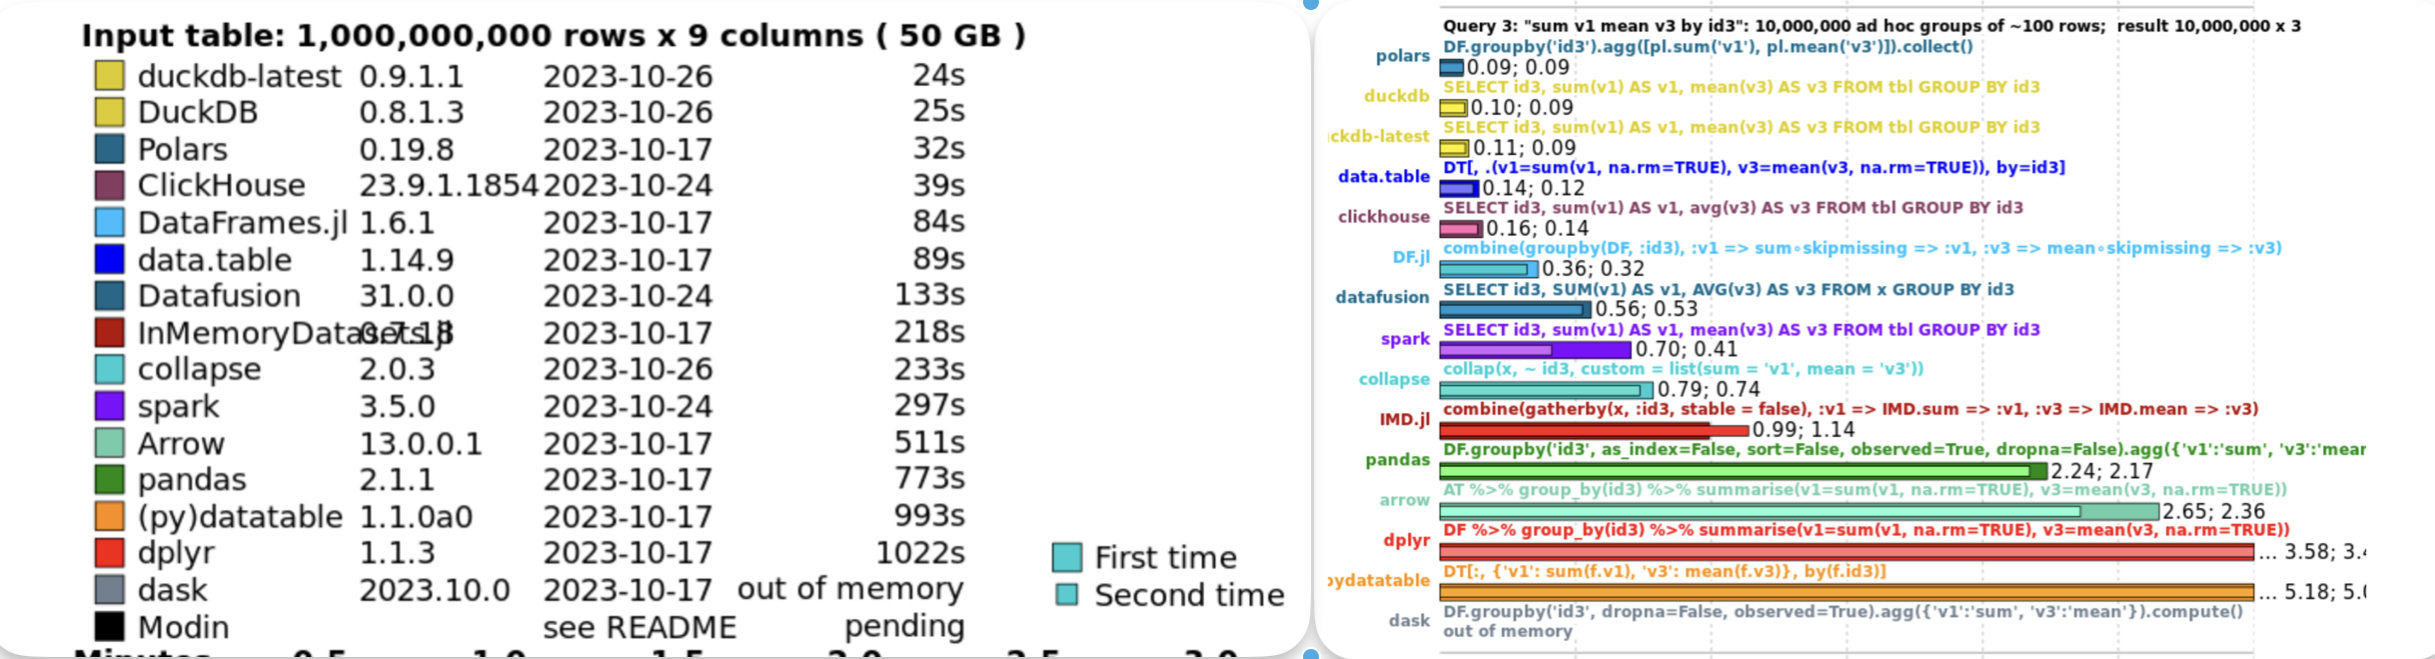

### Written in Rust 🦀

Rust doing some real magic for Python ecosystem:

New all-the-things Python linting, formatting, etc. with `ruff`

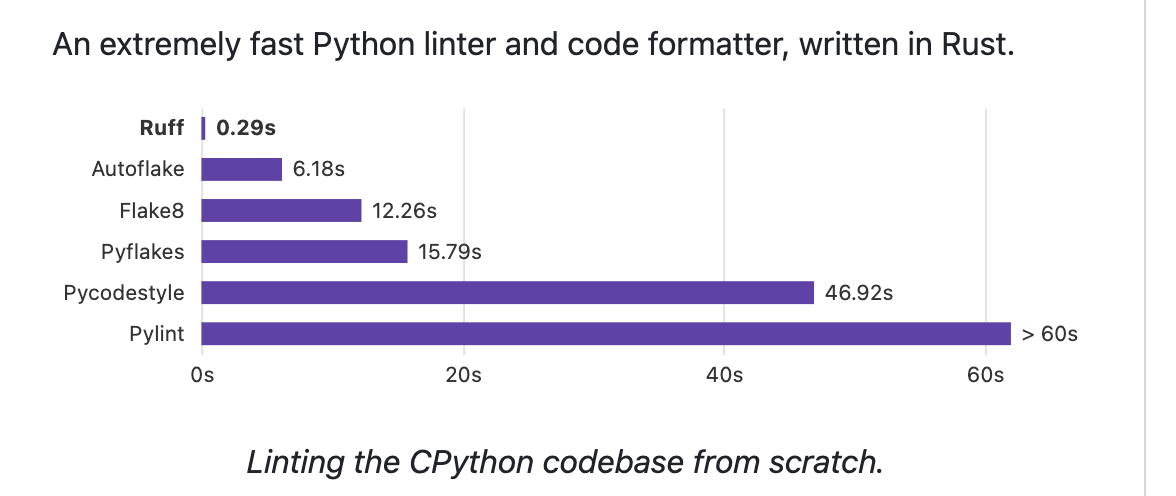

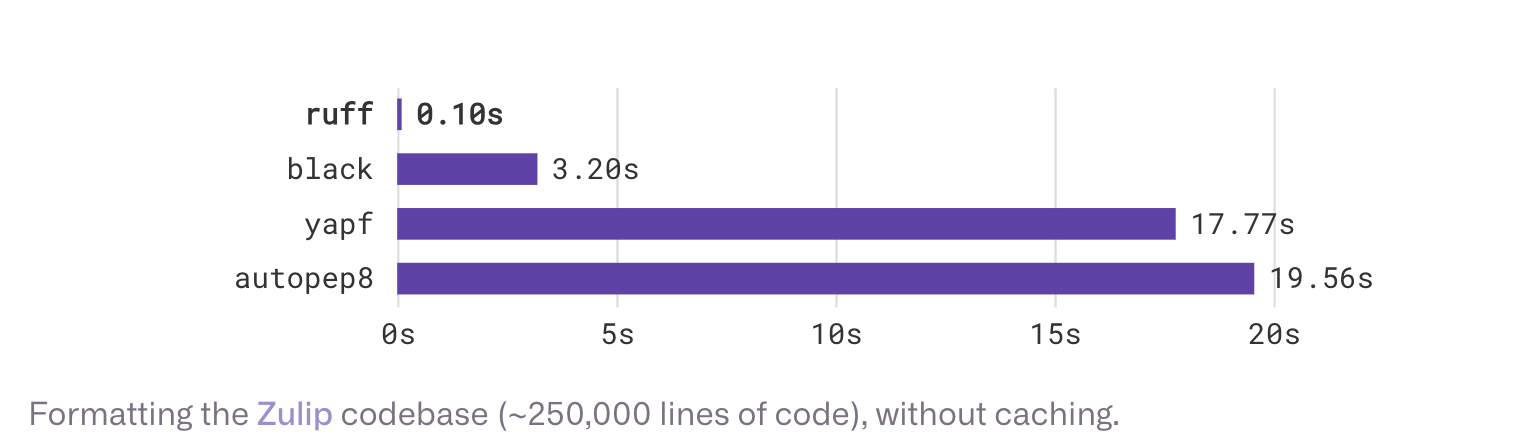

OpenAI's `tiktoken`
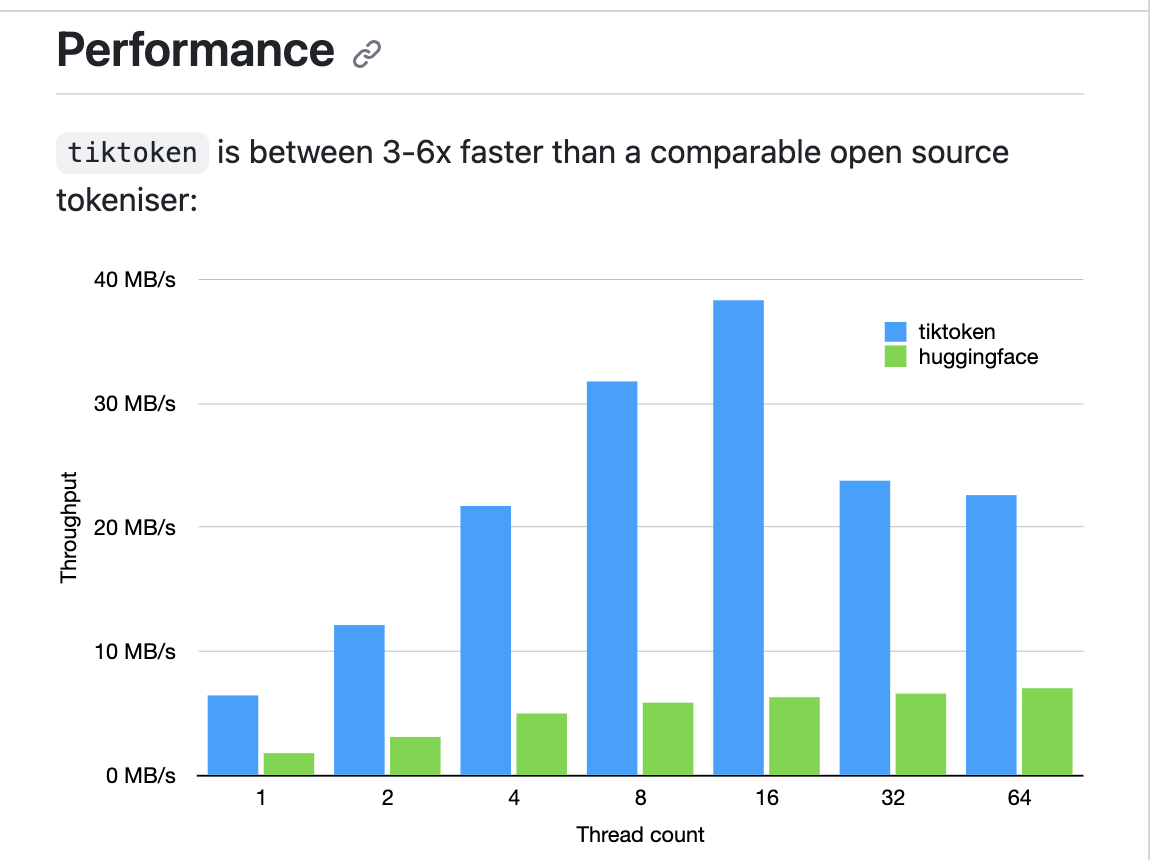

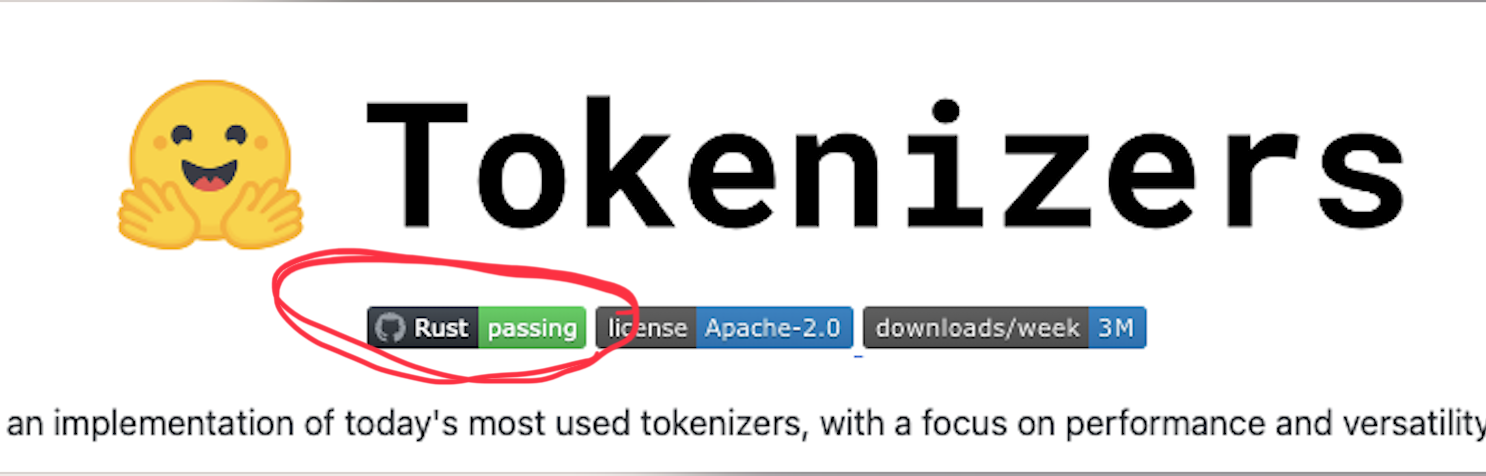

Recently ran across `nbstripout-fast` which is a Rust re-write of `nbstripout` and it makes stripping notebook output on git hook much more transparent.
```
(train) β time nbstripout *.ipynb

real	0m0.299s
user	0m0.275s
sys	0m0.024s
(train) β time nbstripout-fast *.ipynb

real	0m0.007s
user	0m0.004s
sys	0m0.003s
```

## Based on Arrow

[Pandas 2.0 and its Ecosystem (Arrow, Polars, DuckDB)](https://airbyte.com/blog/pandas-2-0-ecosystem-arrow-polars-duckdb)

Can get speedups in `pandas` just from:  
    1. Using parquet and arrow files  
    2. Using the 2.0 Arrow backend  

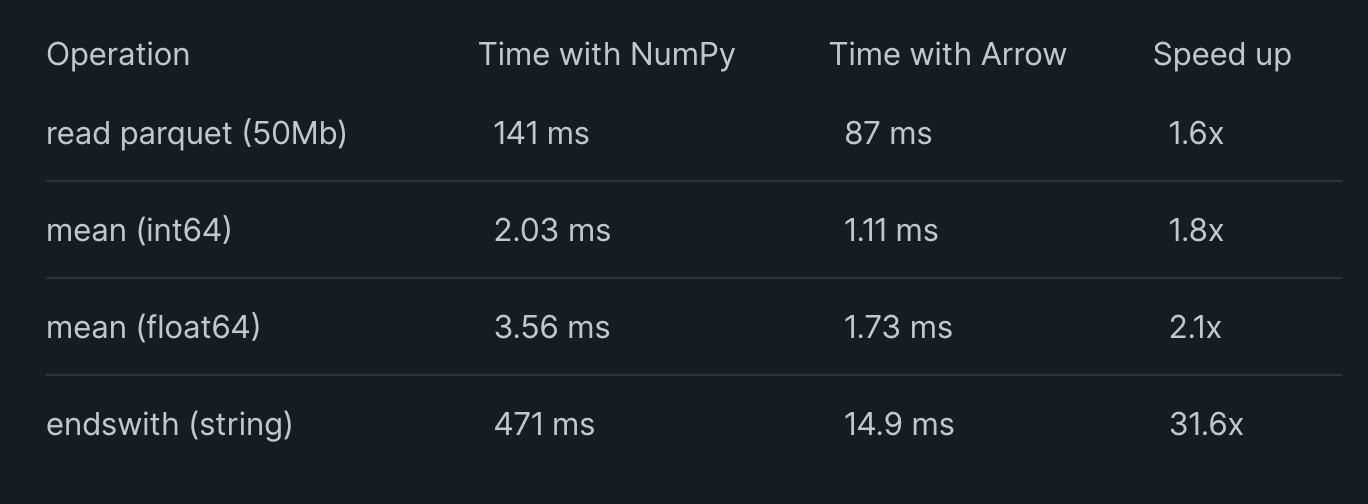

This also gives `polars` very nice no-copy interop with the broader Python ecosystem.
- `to_numpy()`
- `to_pandas()`
- For `duckdb` ([docs](https://duckdb.org/docs/guides/python/polars.html#polars-to-duckdb)):
```python
df = pl.DataFrame(
    {
        "A": [1, 2, 3, 4, 5],
        "fruits": ["banana", "banana", "apple", "apple", "banana"],
        "B": [5, 4, 3, 2, 1],
        "cars": ["beetle", "audi", "beetle", "beetle", "beetle"],
    }
)
duckdb.sql('SELECT * FROM df').show()
```

## Query Engine Optimization

Ritchie Vink (polars author) [on polars success](https://www.pola.rs/posts/company-announcement/#:~:text=OLAP%20query%20engine%3A%20I%20see,focuses%20on%20making%20it%20fast.):
```
OLAP query engine: I see DataFrames as a front-end on a query engine. Polars is a fast vectorized query engine that has excellent performance and memory usage. Besides that, Polars comes with a query optimizer, meaning that users can write idiomatic code and the optimizer focuses on making it fast
```

## 2. Beautiful API 🦋

Ritchie Vink (polars author) [on polars success](https://www.pola.rs/posts/company-announcement/#:~:text=OLAP%20query%20engine%3A%20I%20see,focuses%20on%20making%20it%20fast.):
```
A strict, consistent and composable API. Polars gives you the hangover up front and fails fast, making it very suitable for writing correct data pipelines.
```

### What package to we all know and love that has a particularly messy API?

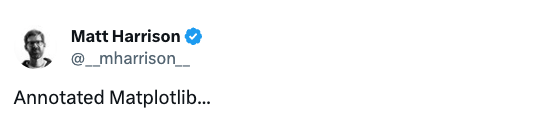
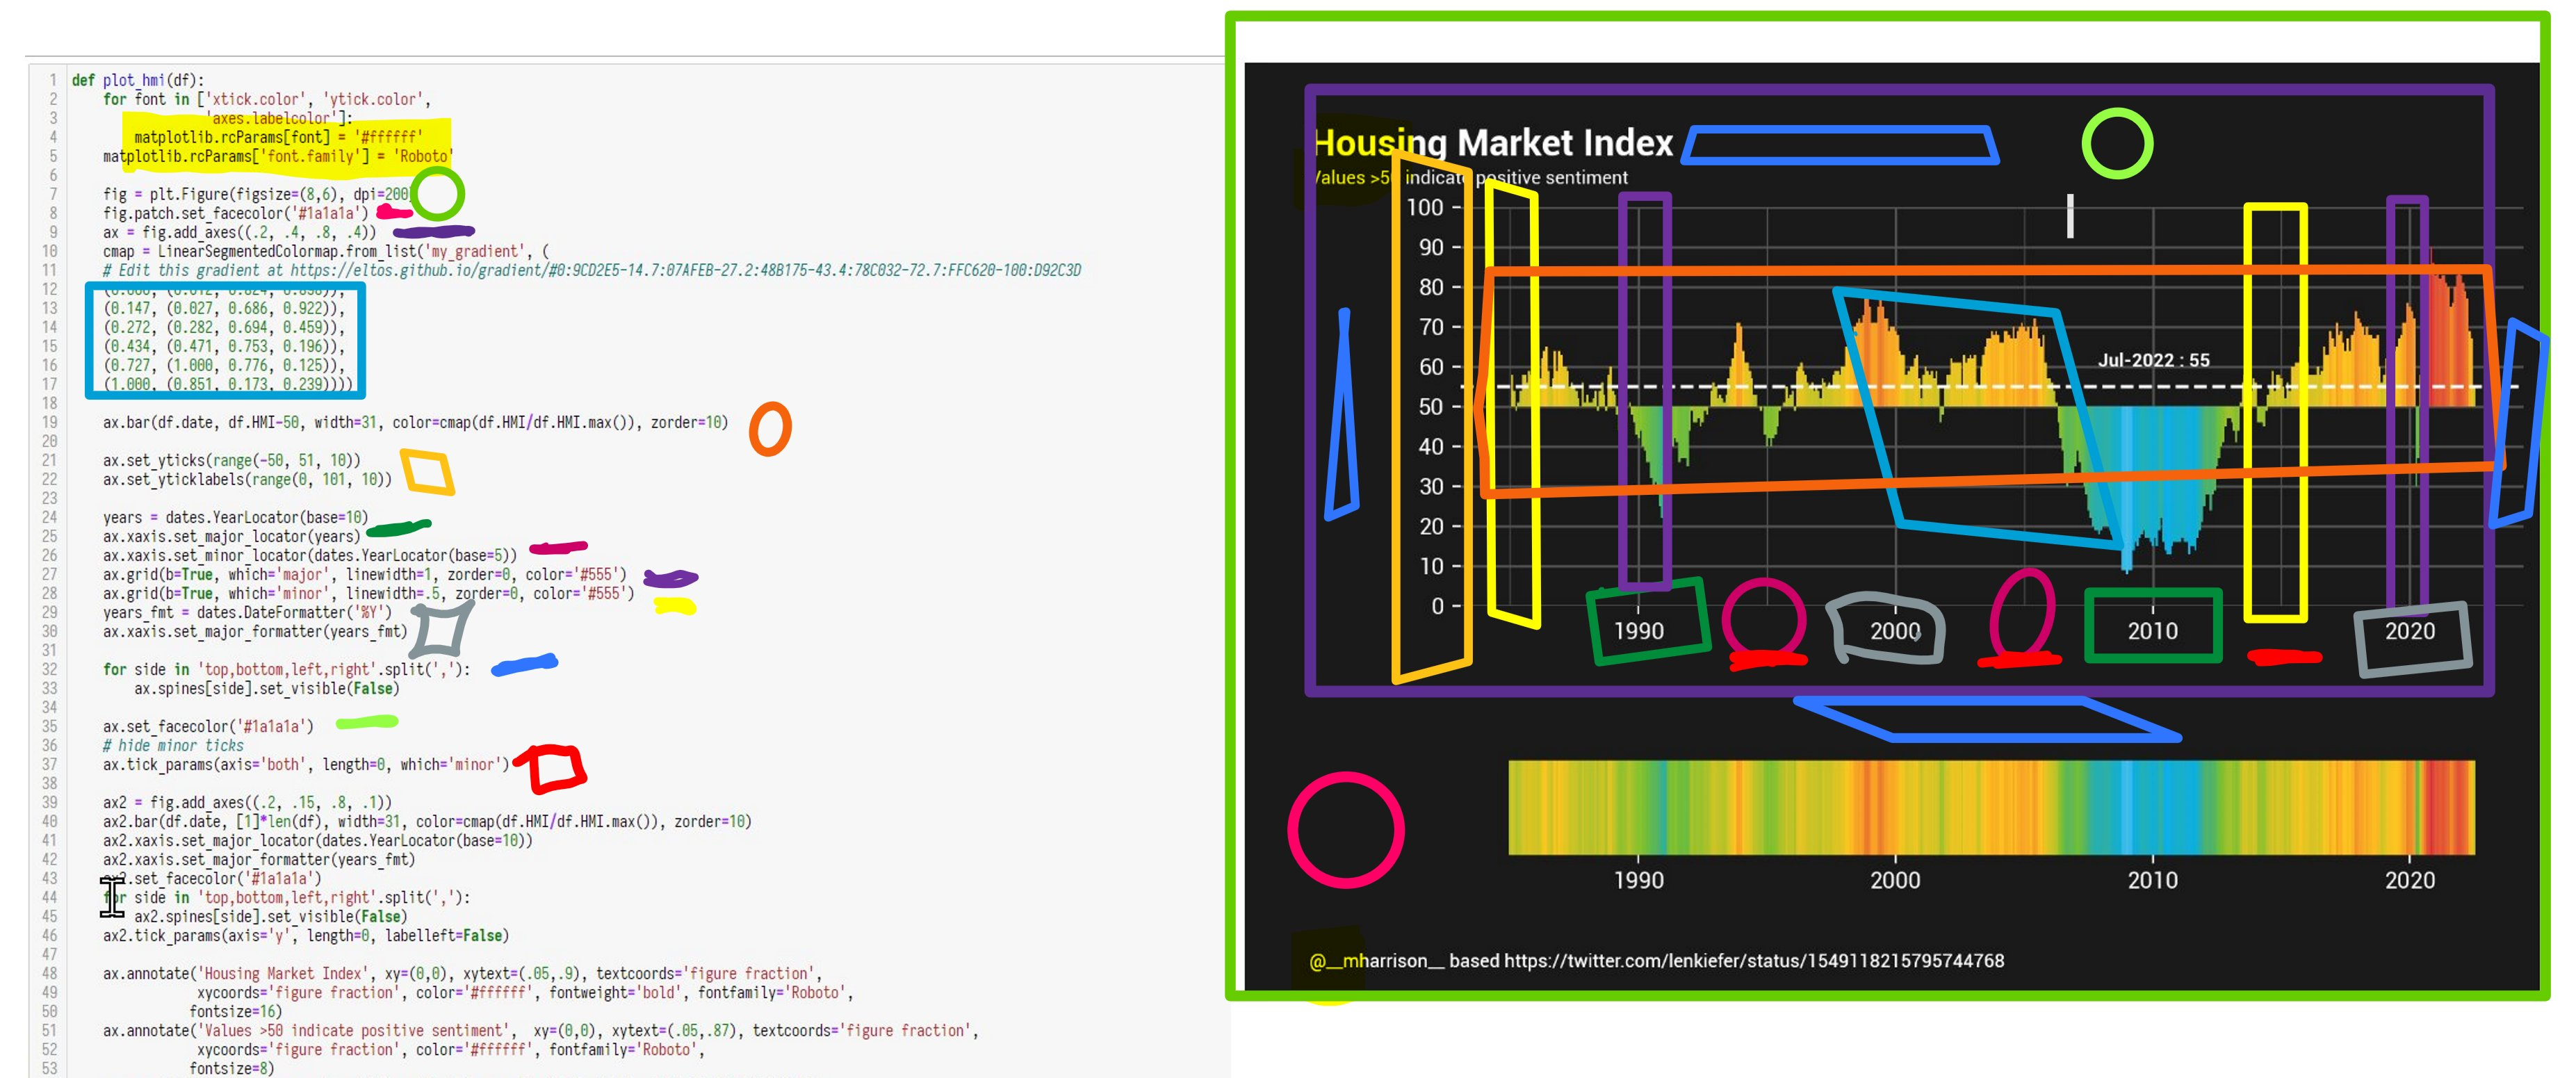
([tweet](https://twitter.com/__mharrison__/status/1722282954691395621))  

### What visualization library has a beautiful API?

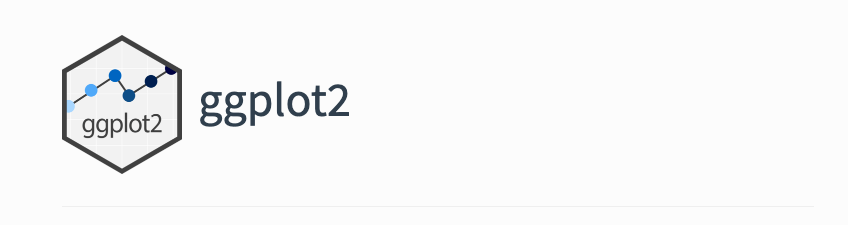

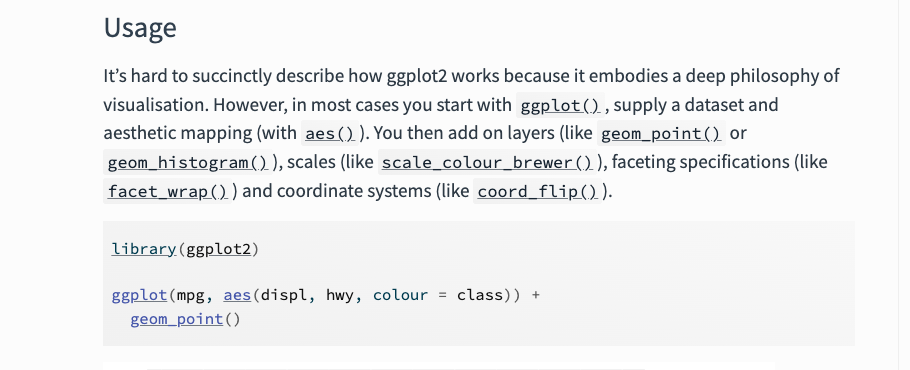

`pandas` feels closer to `matplotlib` than `ggplot` 

Feels a bit like

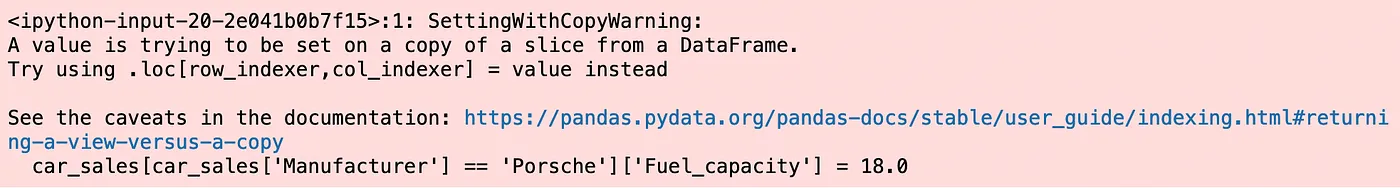
([src](https://medium.com/analytics-vidhya/3-ways-to-deal-with-settingwithcopywarning-in-pandas-f06bfbd0a86b))

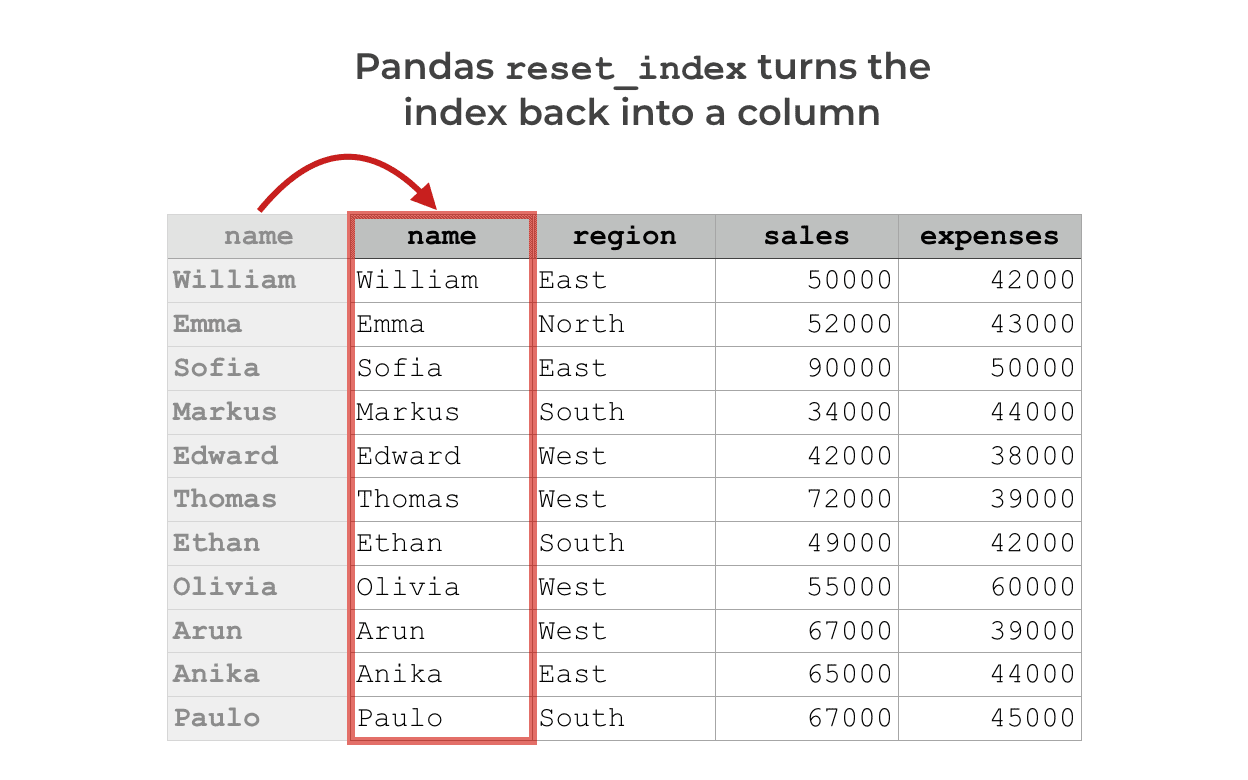
([src](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.sharpsightlabs.com%2Fblog%2Fpandas-reset-index%2F&psig=AOvVaw1Os4yvyY_D1qgza5879uGJ&ust=1699646353683000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCOjv9prat4IDFQAAAAAdAAAAABAR))

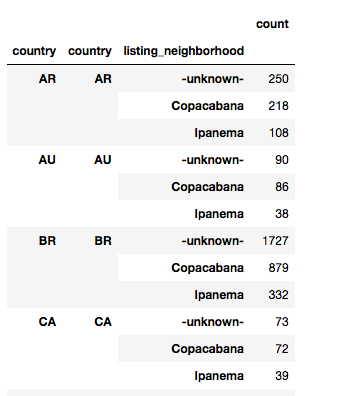
([src](https://www.google.com/url?sa=i&url=https%3A%2F%2Fstackoverflow.com%2Fquestions%2F48761486%2Fpandas-unable-to-reset-index-because-name-exist&psig=AOvVaw1Os4yvyY_D1qgza5879uGJ&ust=1699646353683000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCOjv9prat4IDFQAAAAAdAAAAABAZ))

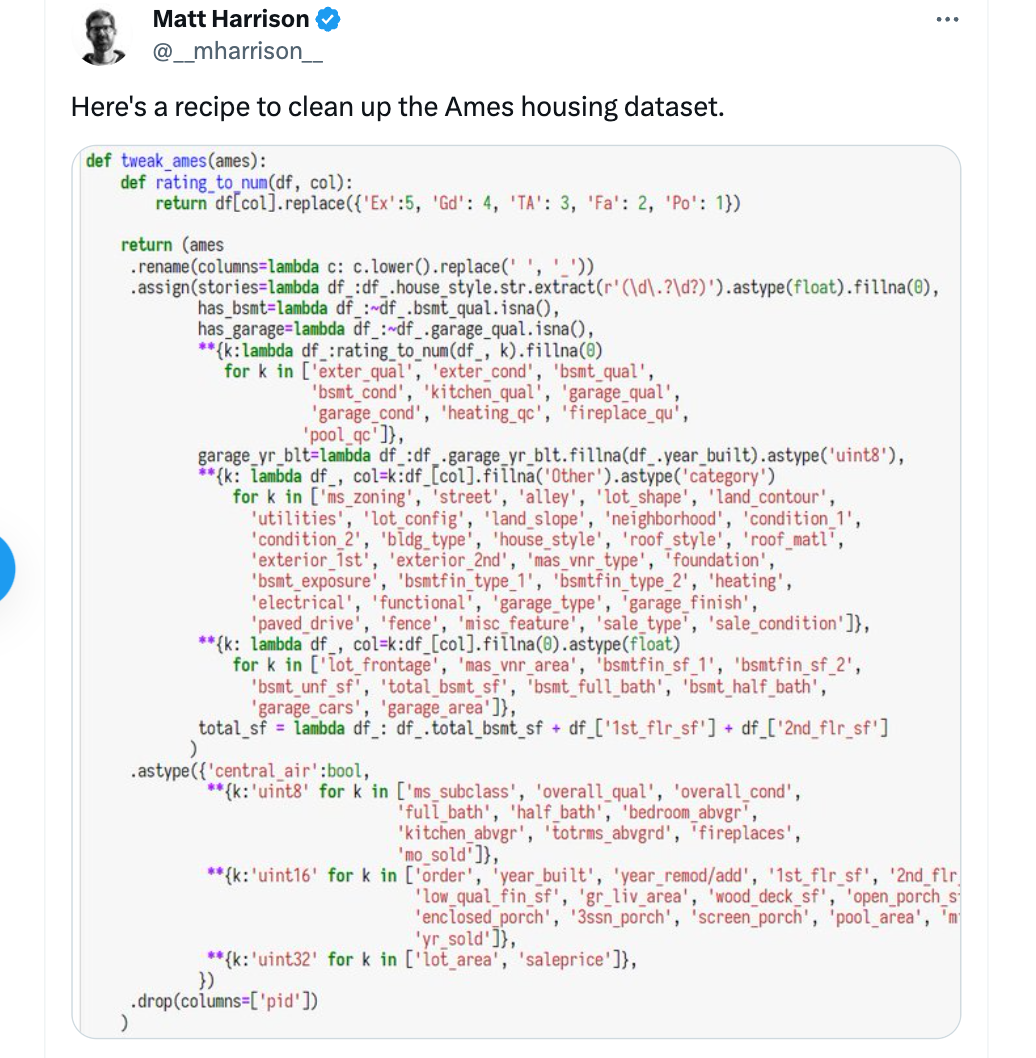
([src](https://x.com/__mharrison__/status/1582393274102206467?s=20))

What dataframe library has a beautiful API?

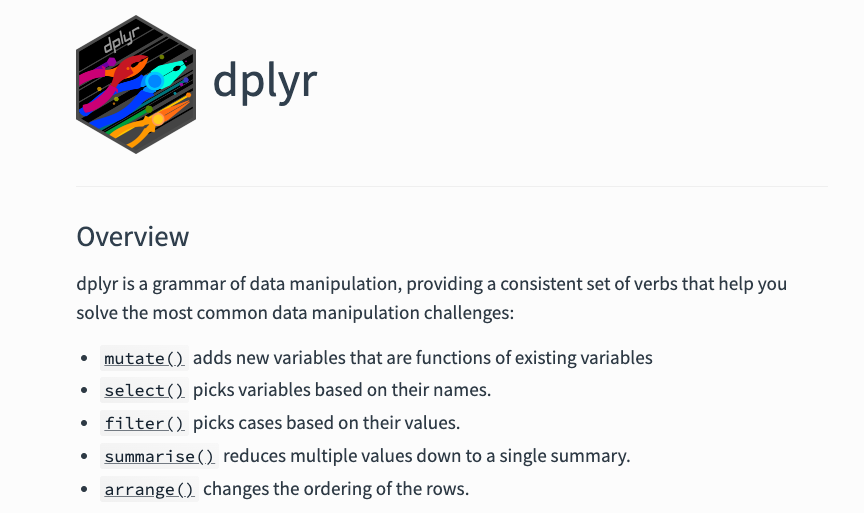

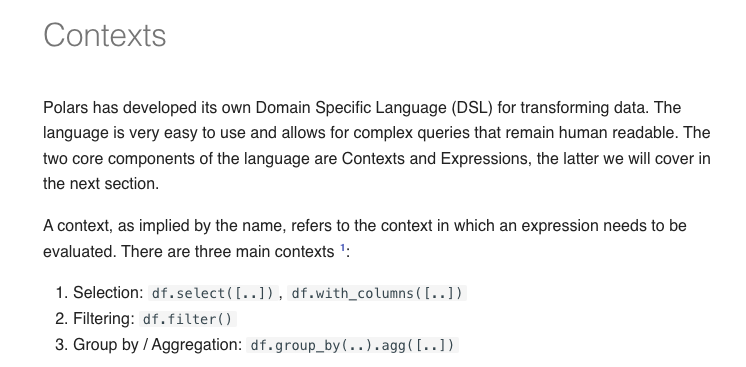
([docs](https://pola-rs.github.io/polars/user-guide/concepts/contexts/))

# When polars?

- Single node
- Fits in memory
- Larger than memory datasets, but not Spark
- 4 billion rows limit before needing `bigidx` feature `pip install polars-u64-idx`
- Has worked quite well in the low TB's in my own usage either with memory mapping, streaming, or chunking the computation.

# The Basics

In [21]:
import polars as pl

In [23]:
df = pl.read_csv("datasets/ml-latest/ratings.csv")
df.head()

shape: (5, 4)
┌────────┬─────────┬────────┬────────────┐
│ userId ┆ movieId ┆ rating ┆ timestamp  │
│ ---    ┆ ---     ┆ ---    ┆ ---        │
│ i64    ┆ i64     ┆ f64    ┆ i64        │
╞════════╪═════════╪════════╪════════════╡
│ 1      ┆ 1       ┆ 4.0    ┆ 1225734739 │
│ 1      ┆ 110     ┆ 4.0    ┆ 1225865086 │
│ 1      ┆ 158     ┆ 4.0    ┆ 1225733503 │
│ 1      ┆ 260     ┆ 4.5    ┆ 1225735204 │
│ 1      ┆ 356     ┆ 5.0    ┆ 1225735119 │
└────────┴─────────┴────────┴────────────┘

In [26]:
df.sample(5)

shape: (5, 4)
┌────────┬─────────┬────────┬────────────┐
│ userId ┆ movieId ┆ rating ┆ timestamp  │
│ ---    ┆ ---     ┆ ---    ┆ ---        │
│ i64    ┆ i64     ┆ f64    ┆ i64        │
╞════════╪═════════╪════════╪════════════╡
│ 286248 ┆ 157340  ┆ 2.5    ┆ 1509388136 │
│ 165519 ┆ 164     ┆ 4.0    ┆ 842971243  │
│ 184349 ┆ 72393   ┆ 3.5    ┆ 1488081527 │
│ 117609 ┆ 81845   ┆ 3.5    ┆ 1590390585 │
│ 148048 ┆ 2664    ┆ 4.0    ┆ 1337202900 │
└────────┴─────────┴────────┴────────────┘

In [27]:
df.describe()

shape: (9, 5)
┌────────────┬──────────────┬──────────────┬─────────────┬──────────────┐
│ describe   ┆ userId       ┆ movieId      ┆ rating      ┆ timestamp    │
│ ---        ┆ ---          ┆ ---          ┆ ---         ┆ ---          │
│ str        ┆ f64          ┆ f64          ┆ f64         ┆ f64          │
╞════════════╪══════════════╪══════════════╪═════════════╪══════════════╡
│ count      ┆ 3.3832162e7  ┆ 3.3832162e7  ┆ 3.3832162e7 ┆ 3.3832162e7  │
│ null_count ┆ 0.0          ┆ 0.0          ┆ 0.0         ┆ 0.0          │
│ mean       ┆ 165437.98389 ┆ 28313.483494 ┆ 3.54254     ┆ 1.2694e9     │
│ std        ┆ 95341.222885 ┆ 49928.650928 ┆ 1.063959    ┆ 2.5410e8     │
│ min        ┆ 1.0          ┆ 1.0          ┆ 0.5         ┆ 7.89652004e8 │
│ 25%        ┆ 82953.0      ┆ 1219.0       ┆ 3.0         ┆ 1.0467e9     │
│ 50%        ┆ 166129.0     ┆ 3263.0       ┆ 4.0         ┆ 1.2647e9     │
│ 75%        ┆ 247450.0     ┆ 40491.0      ┆ 4.0         ┆ 1.4969e9     │
│ max        ┆ 330975.0     ┆ 288983.0     ┆ 5.0         ┆ 1.6898e9     │
└────────────┴──────────────┴──────────────┴─────────────┴──────────────┘

In [132]:
df.write_parquet("transformed_dataset.parquet")

## No index!

In [175]:
df.with_row_count().head()

shape: (5, 5)
┌────────┬────────┬─────────┬────────┬────────────┐
│ row_nr ┆ userId ┆ movieId ┆ rating ┆ timestamp  │
│ ---    ┆ ---    ┆ ---     ┆ ---    ┆ ---        │
│ u32    ┆ i64    ┆ i64     ┆ f64    ┆ i64        │
╞════════╪════════╪═════════╪════════╪════════════╡
│ 0      ┆ 1      ┆ 1       ┆ 4.0    ┆ 1225734739 │
│ 1      ┆ 1      ┆ 110     ┆ 4.0    ┆ 1225865086 │
│ 2      ┆ 1      ┆ 158     ┆ 4.0    ┆ 1225733503 │
│ 3      ┆ 1      ┆ 260     ┆ 4.5    ┆ 1225735204 │
│ 4      ┆ 1      ┆ 356     ┆ 5.0    ┆ 1225735119 │
└────────┴────────┴─────────┴────────┴────────────┘

## Contexts

### 1. Selection

In [72]:
df.select("userId").head(1)

shape: (1, 1)
┌────────┐
│ userId │
│ ---    │
│ i64    │
╞════════╡
│ 1      │
└────────┘

In [117]:
df.with_columns(
    norm_rating=pl.col("rating") / pl.col("rating").max()
).head(1)

shape: (1, 5)
┌────────┬─────────┬────────┬────────────┬─────────────┐
│ userId ┆ movieId ┆ rating ┆ timestamp  ┆ norm_rating │
│ ---    ┆ ---     ┆ ---    ┆ ---        ┆ ---         │
│ i64    ┆ i64     ┆ f64    ┆ i64        ┆ f64         │
╞════════╪═════════╪════════╪════════════╪═════════════╡
│ 1      ┆ 1       ┆ 4.0    ┆ 1225734739 ┆ 0.8         │
└────────┴─────────┴────────┴────────────┴─────────────┘

### 2. Filtering

In [118]:
df.shape

(33832162, 4)

In [119]:
df.filter(pl.col("rating") == 5).shape

(4957902, 4)

In [122]:
df.filter(
    (pl.col("rating") == 5) | (pl.col("rating") == 0.5)
).shape

(5524208, 4)

### 3. Aggregation

In [86]:
df.group_by(pl.col("movieId")).agg(pl.col("rating").mean()).head(5)

shape: (5, 2)
┌─────────┬──────────┐
│ movieId ┆ rating   │
│ ---     ┆ ---      │
│ i64     ┆ f64      │
╞═════════╪══════════╡
│ 267456  ┆ 3.720459 │
│ 87520   ┆ 2.683784 │
│ 203008  ┆ 3.0      │
│ 93024   ┆ 2.911765 │
│ 277872  ┆ 3.5      │
└─────────┴──────────┘

In [124]:
(
    df.group_by(pl.col("movieId"))
    .agg(
        r_mean=pl.col("rating").mean(),
        r_min=pl.col("rating").min(),
        r_max=pl.col("rating").max()
    )
).head(5)

shape: (5, 4)
┌─────────┬──────────┬───────┬───────┐
│ movieId ┆ r_mean   ┆ r_min ┆ r_max │
│ ---     ┆ ---      ┆ ---   ┆ ---   │
│ i64     ┆ f64      ┆ f64   ┆ f64   │
╞═════════╪══════════╪═══════╪═══════╡
│ 237736  ┆ 4.0      ┆ 4.0   ┆ 4.0   │
│ 242232  ┆ 3.75     ┆ 3.0   ┆ 4.5   │
│ 219464  ┆ 4.166667 ┆ 3.5   ┆ 5.0   │
│ 220296  ┆ 1.875    ┆ 0.5   ┆ 4.0   │
│ 167744  ┆ 2.913043 ┆ 0.5   ┆ 4.5   │
└─────────┴──────────┴───────┴───────┘

## Expressions

- A mapping from a series to a series. Series in, series out. 
- Because of this can pipe expressions together similar to method chaining piping dataframe methods together.
- Executed in parallel

Quite a bit here!

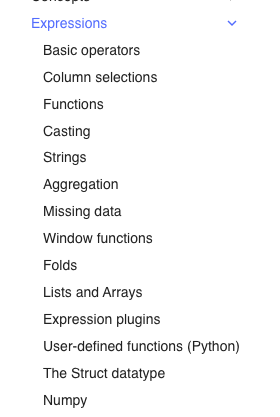

In [145]:
pl.col("col") + 5

In [146]:
type(_)

polars.expr.expr.Expr

In [153]:
[pl.col(col) + i for i, col in enumerate(["userId", "movieId"], start=1)]

In [154]:
df.select(_).head()

shape: (5, 2)
┌────────┬─────────┐
│ userId ┆ movieId │
│ ---    ┆ ---     │
│ i64    ┆ i64     │
╞════════╪═════════╡
│ 2      ┆ 3       │
│ 2      ┆ 112     │
│ 2      ┆ 160     │
│ 2      ┆ 262     │
│ 2      ┆ 358     │
└────────┴─────────┘

In [155]:
df.select(
    pl.col("userId") + 1,
    pl.col("movieId") + 2,
).head()

shape: (5, 2)
┌────────┬─────────┐
│ userId ┆ movieId │
│ ---    ┆ ---     │
│ i64    ┆ i64     │
╞════════╪═════════╡
│ 2      ┆ 3       │
│ 2      ┆ 112     │
│ 2      ┆ 160     │
│ 2      ┆ 262     │
│ 2      ┆ 358     │
└────────┴─────────┘

In [164]:
(
    df
    .select(
        pl.col("rating")
        .cast(pl.Float32)
        .truediv(pl.col("rating").max())
        .ge(0.5)
    )
    .group_by("rating")
    .count()
)

shape: (2, 2)
┌────────┬──────────┐
│ rating ┆ count    │
│ ---    ┆ ---      │
│ bool   ┆ u32      │
╞════════╪══════════╡
│ true   ┆ 29543310 │
│ false  ┆ 4288852  │
└────────┴──────────┘

## Method Chaining Syntax

In [125]:
df.filter(pl.col("userId") == 1).group_by("rating").count().sort("count")

shape: (7, 2)
┌────────┬───────┐
│ rating ┆ count │
│ ---    ┆ ---   │
│ f64    ┆ u32   │
╞════════╪═══════╡
│ 2.5    ┆ 1     │
│ 2.0    ┆ 1     │
│ 4.5    ┆ 5     │
│ 3.0    ┆ 8     │
│ 3.5    ┆ 11    │
│ 5.0    ┆ 15    │
│ 4.0    ┆ 21    │
└────────┴───────┘

In [126]:
df.head()

shape: (5, 4)
┌────────┬─────────┬────────┬────────────┐
│ userId ┆ movieId ┆ rating ┆ timestamp  │
│ ---    ┆ ---     ┆ ---    ┆ ---        │
│ i64    ┆ i64     ┆ f64    ┆ i64        │
╞════════╪═════════╪════════╪════════════╡
│ 1      ┆ 1       ┆ 4.0    ┆ 1225734739 │
│ 1      ┆ 110     ┆ 4.0    ┆ 1225865086 │
│ 1      ┆ 158     ┆ 4.0    ┆ 1225733503 │
│ 1      ┆ 260     ┆ 4.5    ┆ 1225735204 │
│ 1      ┆ 356     ┆ 5.0    ┆ 1225735119 │
└────────┴─────────┴────────┴────────────┘

In [127]:
(
    df
    .head()
)

shape: (5, 4)
┌────────┬─────────┬────────┬────────────┐
│ userId ┆ movieId ┆ rating ┆ timestamp  │
│ ---    ┆ ---     ┆ ---    ┆ ---        │
│ i64    ┆ i64     ┆ f64    ┆ i64        │
╞════════╪═════════╪════════╪════════════╡
│ 1      ┆ 1       ┆ 4.0    ┆ 1225734739 │
│ 1      ┆ 110     ┆ 4.0    ┆ 1225865086 │
│ 1      ┆ 158     ┆ 4.0    ┆ 1225733503 │
│ 1      ┆ 260     ┆ 4.5    ┆ 1225735204 │
│ 1      ┆ 356     ┆ 5.0    ┆ 1225735119 │
└────────┴─────────┴────────┴────────────┘

In [128]:
(
    df
    .filter(pl.col("userId") == 1)
    .head()
)

shape: (5, 4)
┌────────┬─────────┬────────┬────────────┐
│ userId ┆ movieId ┆ rating ┆ timestamp  │
│ ---    ┆ ---     ┆ ---    ┆ ---        │
│ i64    ┆ i64     ┆ f64    ┆ i64        │
╞════════╪═════════╪════════╪════════════╡
│ 1      ┆ 1       ┆ 4.0    ┆ 1225734739 │
│ 1      ┆ 110     ┆ 4.0    ┆ 1225865086 │
│ 1      ┆ 158     ┆ 4.0    ┆ 1225733503 │
│ 1      ┆ 260     ┆ 4.5    ┆ 1225735204 │
│ 1      ┆ 356     ┆ 5.0    ┆ 1225735119 │
└────────┴─────────┴────────┴────────────┘

In [129]:
(
    df
    .filter(pl.col("userId") == 1)
    .group_by("rating")
    .count()
)

shape: (7, 2)
┌────────┬───────┐
│ rating ┆ count │
│ ---    ┆ ---   │
│ f64    ┆ u32   │
╞════════╪═══════╡
│ 2.5    ┆ 1     │
│ 4.5    ┆ 5     │
│ 2.0    ┆ 1     │
│ 3.5    ┆ 11    │
│ 3.0    ┆ 8     │
│ 5.0    ┆ 15    │
│ 4.0    ┆ 21    │
└────────┴───────┘

In [130]:
(
    df
    .filter(pl.col("userId") == 1)
    .group_by("rating")
    .count()
    .sort("count")
)

shape: (7, 2)
┌────────┬───────┐
│ rating ┆ count │
│ ---    ┆ ---   │
│ f64    ┆ u32   │
╞════════╪═══════╡
│ 2.5    ┆ 1     │
│ 2.0    ┆ 1     │
│ 4.5    ┆ 5     │
│ 3.0    ┆ 8     │
│ 3.5    ┆ 11    │
│ 5.0    ┆ 15    │
│ 4.0    ┆ 21    │
└────────┴───────┘

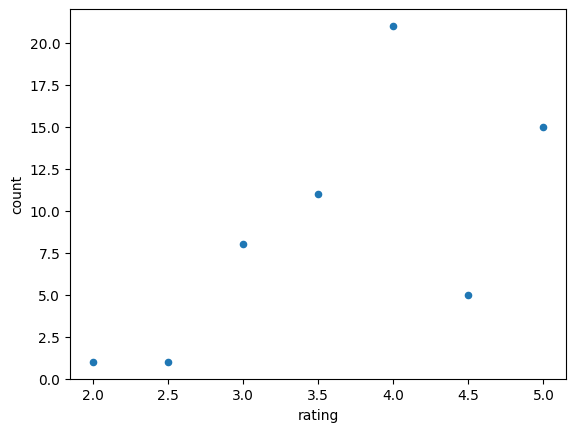

In [131]:
(
    df
    .filter(pl.col("userId") == 1)
    .group_by("rating")
    .count()
    .sort("count")
).to_pandas().plot(x="rating", y="count", kind="scatter");

## Composable Transformation Pipelines

In [112]:
def snake_case_ftw(df):
    return (
        df
        .rename({"movieId": "movie_id", "userId": "user_id"})
    )

In [113]:
def only_big_time_reviewers(df):
    return (
        df
        .filter(
           pl.count().over("user_id") > 1000
        )
    )

In [114]:
(
    df
    .
    .pipe(snake_case_ftw)
    .pipe(only_big_time_reviewers)
)["user_id"].n_unique()

3651

## Lazy Evaluation 

```
1.4GB Parquet:
- 25s
- 108GB+ peak memory usage

54GB Arrow:
- 10s
- 16GB peak memory usage

+ Lazy Scan:
- 1s
- 3GB peak memory usage
```

```python
df = (
    pl.scan_ipc("dataset.arrow")
    .join(cohort.lazy(), on="id", validate="m:1")
    .select("id", "date", "seq_event", "seq_event_id")
    .collect()
)
```

Use `.explain()` to inspect the optimized query plan

## SQL Context

In [171]:
(
    pl.SQLContext(df=df)
    .execute(
        "SELECT userId, rating*2 AS double_rate FROM df"
    )
    .collect()
).head()

shape: (5, 2)
┌────────┬─────────────┐
│ userId ┆ double_rate │
│ ---    ┆ ---         │
│ i64    ┆ f64         │
╞════════╪═════════════╡
│ 1      ┆ 8.0         │
│ 1      ┆ 8.0         │
│ 1      ┆ 8.0         │
│ 1      ┆ 9.0         │
│ 1      ┆ 10.0        │
└────────┴─────────────┘

## Larger than memory dataset

- Serialize the dataset as `.arrow` file and `.read_ipc()` will default to memory map the file. 

- Use `.collect(streaming=True)` to stream the computation. (See [docs](https://pola-rs.github.io/polars/user-guide/concepts/streaming/) on supported ops)

- Lazily evaluate computation in chunks on full dataset with `.scan_ipc()` and `.slice()`

Examples on ~4TB 250B rows

In [134]:
def row_count(path):
    return(
        pl.scan_ipc(path, cache=False, rechunk=False, memory_map=True)
        .select(pl.count())
        .collect()
        .item()
    )

In [135]:
def event_counts(path, n_rows, chunk_size = 5_000):
    results = []
    df = pl.scan_ipc(path, cache=False, rechunk=False, memory_map=True)
    for start in range(0, n_rows, chunk_size):
        chunk = df.slice(start, chunk_size)
        partial_result = (
            chunk
            .select(pl.col("event").alias("event_id"))
            .explode("event_id")
            .groupby("event_id")
            .agg(pl.count().cast(pl.UInt64).alias("count"))
        )
        results.append(partial_result)
    final_result = (
        pl.concat(results)
        .groupby("event_id")
        .agg(pl.sum("count").cast(pl.UInt64).alias("count"))
        .sort("count", descending=True)
        .collect()
    )
    return final_result

# Tutorials

Coming from Pandas - https://pola-rs.github.io/polars/user-guide/migration/pandas/
Modern Polars - https://kevinheavey.github.io/modern-polars/

# Thanks! 🙏